In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
class NN:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        self.lr = learningrate
        self.v_who = 0
        self.v_wih = 0
    
    def activation_function(self, x):
        return 1 / (1 + numpy.exp(-x))
    
    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T

        # Forward pass
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        # Compute errors
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        
        momentum = 0.9

        # Update hidden-to-output weights (self.who)
        self.v_who = momentum * self.v_who + self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.who += self.v_who

        # Update input-to-hidden weights (self.wih)
        self.v_wih = momentum * self.v_wih + self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        self.wih += self.v_wih

    def test(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs


In [3]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [4]:
training_data_file = pd.read_csv('https://pjreddie.com/media/files/mnist_train.csv')
training_data_list = training_data_file.to_numpy()
test_data_file = pd.read_csv('https://pjreddie.com/media/files/mnist_test.csv')
test_data_list = test_data_file.to_numpy()

In [7]:
def ANN(hn, lr):
  hidden_nodes = int(hn)
  learning_rate = float(lr)
  input_nodes = 784
  output_nodes = 10
  epochs = 20
  n = NN(input_nodes,hidden_nodes,output_nodes, learning_rate)
  
  pf_list = []
  for e in range(epochs):
    for record in training_data_list: #row 별로 반복
        inputs = (record[1:] / 255.0 * 0.99) + 0.01 # normalize input value to 0.01~1
        targets = numpy.zeros(output_nodes) + 0.01
        targets[record[0]] = 0.99 #target one-hot encoding from 0.1 to 0.99
        n.train(inputs, targets)
        
    scorecard = []
    for record in test_data_list:
      correct_label = record[0] #정답
      inputs = (record[1:] / 255.0 * 0.99) + 0.01
      outputs = n.test(inputs) #test 결과
      label = numpy.argmax(outputs) #test 결과를 자연수로 변환
      if (label == correct_label):
        scorecard.append(1) #정답이면 1, 오답이면 0 추가
      else:
        scorecard.append(0)
        
    scorecard = numpy.asarray(scorecard)
    performance =  scorecard.sum() / scorecard.size
    pf_list.append(performance)
    
    with open(f"wih_{learning_rate}_{hidden_nodes}_{e}","wb")as file:
        pickle.dump(n.wih,file)
    with open(f"who_{learning_rate}_{hidden_nodes}_{e}","wb")as file:
        pickle.dump(n.who,file)
    
  global max_performance
  global max_epoch
  max_performance = max(pf_list) #가장 높은 정확도
  max_epoch = pf_list.index(max(pf_list)) #가장 높은 정확도가 나왔을 때의 epoch: color coding
    



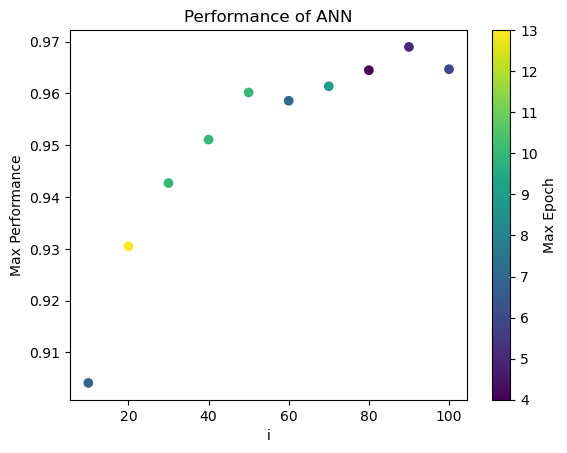

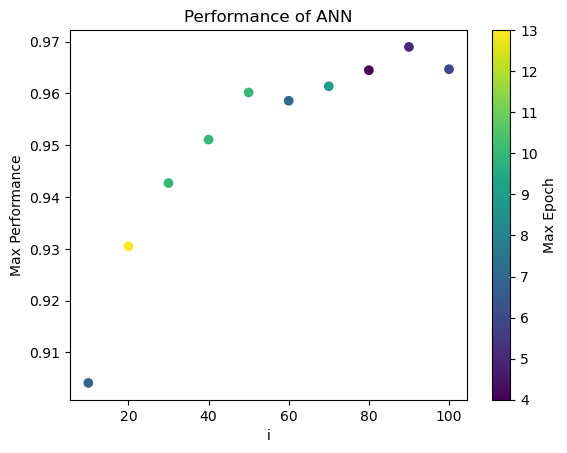

In [8]:
performance_list=[]
epoch_list=[]

for i in range(10,110,10):
    ANN(i,0.01)
    performance_list.append(max_performance)
    epoch_list.append(max_epoch)

plt.scatter(range(10, 110, 10), performance_list, c=epoch_list, cmap='viridis')
plt.colorbar(label='Max Epoch')
plt.xlabel('i')
plt.ylabel('Max Performance')
plt.title('Performance of ANN')
plt.show()

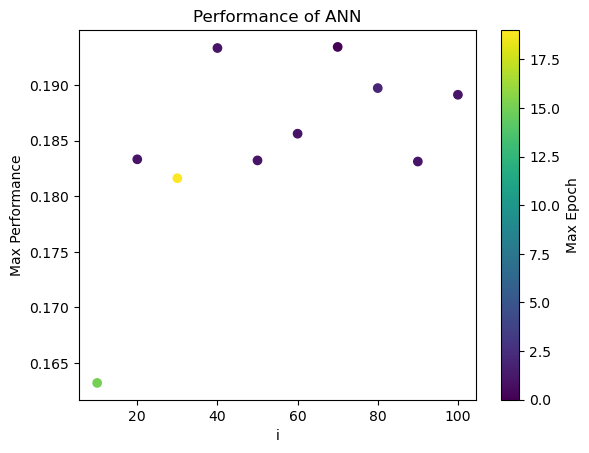

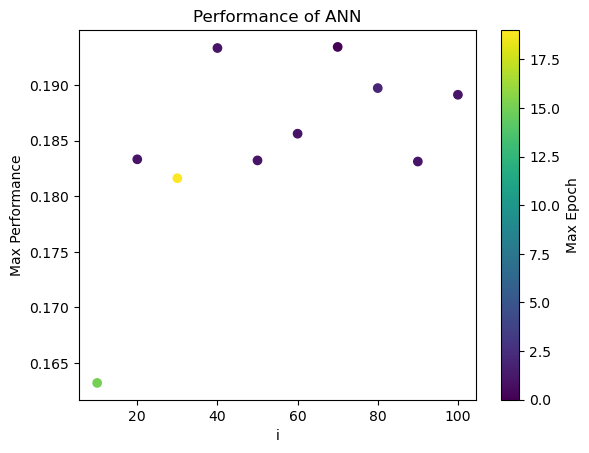

ValueError: 0.1934193419341934 is not in list

ValueError: 0.1934193419341934 is not in list

In [12]:
performance_list=[]
epoch_list=[]

for i in range(10,110,10):
    ANN(i,0.001)
    performance_list.append(max_performance)
    epoch_list.append(max_epoch)

plt.scatter(range(10, 110, 10), performance_list, c=epoch_list, cmap='viridis')
plt.colorbar(label='Max Epoch')
plt.xlabel('i')
plt.ylabel('Max Performance')
plt.title('Performance of ANN')
plt.show()


In [17]:
performance_list=[]
epoch_list=[]

for i in range(120,210,20):
    ANN(i,0.01)
    performance_list.append(max_performance)
    epoch_list.append(max_epoch)

max_performance = max(performance_list)
max_performance_index = performance_list.index(max_performance)
max_epoch = epoch_list[max_performance_index]

plt.scatter(range(20, 210, 20), performance_list, c=epoch_list, cmap='viridis')
plt.colorbar(label='Max Epoch')
plt.xlabel('i')
plt.ylabel('Max Performance')
plt.title('Performance of ANN')
plt.show()


KeyboardInterrupt: 

KeyboardInterrupt: 

ValueError: x and y must be the same size

ValueError: x and y must be the same size

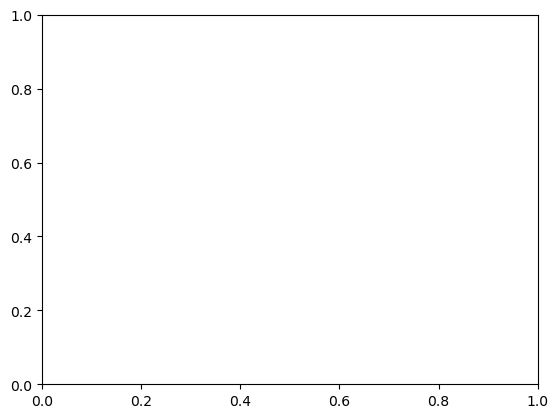

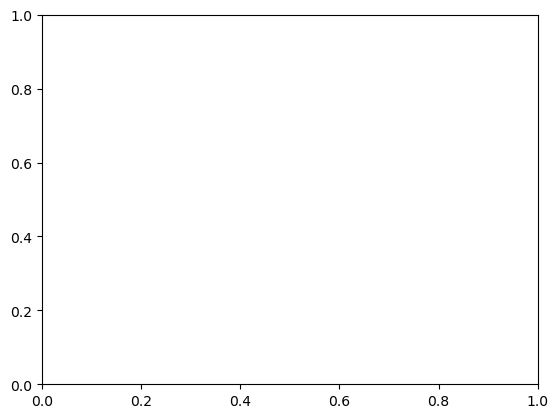

In [19]:
max_performance = max(performance_list)
max_performance_index = performance_list.index(max_performance)
max_epoch = epoch_list[max_performance_index]

plt.scatter(range(20, 180, 20), performance_list, c=epoch_list, cmap='viridis')
plt.colorbar(label='Max Epoch')
plt.xlabel('i')
plt.ylabel('Max Performance')
plt.title('Performance of ANN')
plt.show()


In [ ]:
performance_list=[]
epoch_list=[]

for i in range(20,210,20):
    ANN(i,0.003)
    performance_list.append(max_performance)
    epoch_list.append(max_epoch)

plt.scatter(range(20, 210, 20), performance_list, c=epoch_list, cmap='viridis')
plt.colorbar(label='Max Epoch')
plt.xlabel('i')
plt.ylabel('Max Performance')
plt.title('Performance of ANN')
plt.show()


In [ ]:
performance_list=[]
epoch_list=[]

for i in range(20,210,20):
    ANN(i,0.005)
    performance_list.append(max_performance)
    epoch_list.append(max_epoch)

max_performance = max(performance_list)
max_performance_index = performance_list.index(max_performance)
max_epoch = epoch_list[max_performance_index]

plt.scatter(range(20, 210, 20), performance_list, c=epoch_list, cmap='viridis')
plt.colorbar(label='Max Epoch')
plt.xlabel('i')
plt.ylabel('Max Performance')
plt.title('Performance of ANN')
plt.show()


In [23]:
# Load the weights for self.wih
with open("wih_0.01_60_15", "rb") as file:
    wih_weights = pickle.load(file)

# Load the weights for self.who
with open("who_0.01_60_15", "rb") as file:
    who_weights = pickle.load(file)
    
best_ann = NN(784, 60, 10, 0.01)

best_ann.wih = wih_weights
best_ann.who = who_weights

real_test_data_file = pd.read_csv('mnist_exampledata1.csv')
real_test_data_list = test_data_file.to_numpy()

scorecard = []
for record in test_data_list:
    correct_label = record[0] #정답
    inputs = (record[1:] / 255.0 * 0.99) + 0.01
    outputs = best_ann.test(inputs) #test 결과
    label = numpy.argmax(outputs) #test 결과를 자연수로 변환
    if (label == correct_label):
        scorecard.append(1) #정답이면 1, 오답이면 0 추가
    else:
        scorecard.append(0)
        
scorecard = numpy.asarray(scorecard)
performance =  scorecard.sum() / scorecard.size
print(performance)

0.1639163916391639
0.1639163916391639


In [20]:
print("Maximum Performance:", max_performance)
print("Hidden Nodes:", range(20, 210, 20)[max_performance_index])
print("Epochs:", max_epoch)


Maximum Performance: 0.19111911191119113
Hidden Nodes: 60
Epochs: 16
Maximum Performance: 0.19111911191119113
Hidden Nodes: 60
Epochs: 16
